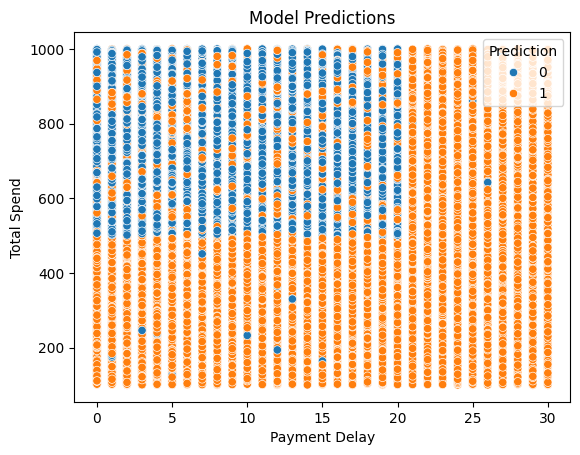

In [3]:
import redis
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la conexión a Redis
r = redis.StrictRedis(host='localhost', port=6379, db=0)

# Recuperar todas las claves de predicción almacenadas en Redis
keys = r.keys('prediction:*')

# Extraer los datos de Redis y convertirlos a un DataFrame
predictions = []
for key in keys:
    prediction = json.loads(r.get(key))
    predictions.append(prediction)

# Convertir la lista de predicciones a un DataFrame de Pandas
df = pd.DataFrame(predictions)

# Mostrar las primeras filas del DataFrame
df.head()
# Convertimos la columna 'Prediction' a valores numéricos si es necesario
df['Prediction'] = df['Prediction'].map({"churned": 1, "no churned": 0})

# Crear el gráfico de dispersión con seaborn
sns.scatterplot(x="Payment Delay", y="Total Spend", hue="Prediction", data=df)
plt.title("Model Predictions")
plt.show()


In [4]:
churned = df[df['Prediction'] == 1]
print(f"Total churned: {len(churned)}")


Total churned: 42251


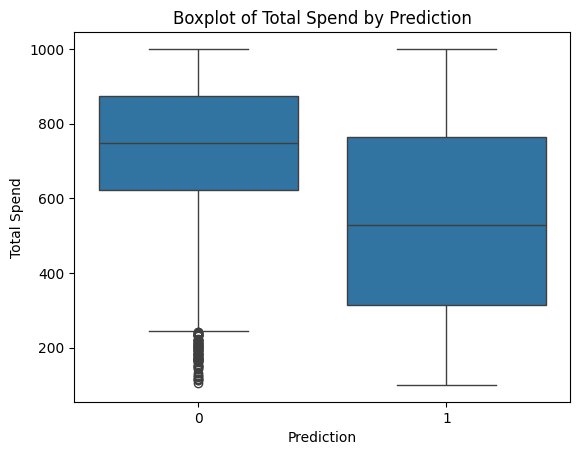

In [5]:
# Boxplot para mostrar la distribución de 'Total Spend' según la predicción
sns.boxplot(x="Prediction", y="Total Spend", data=df)
plt.title("Boxplot of Total Spend by Prediction")
plt.show()


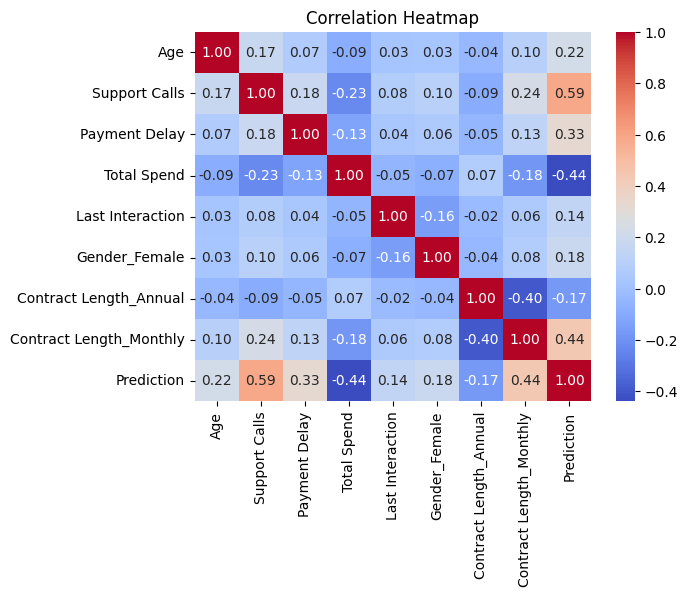

In [6]:
# Matriz de correlación
corr_matrix = df.corr()

# Heatmap de la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
